In [1]:
import pickle
import numpy as np
import pandas as pd
import pickle
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegressionCV
from msresist.figures.figureM2 import TumorType
from msresist.logistic_regression import plotClusterCoefficients, plotPredictionProbabilities, plotConfusionMatrix, plotROC
from msresist.figures.figure3 import plotPCA, plotMotifs
from msresist.clustering import MassSpecClustering
from msresist.pre_processing import filter_NaNpeptides, MeanCenter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

Matplotlib is building the font cache; this may take a moment.


## PAM250 15 CLUSTERS

In [3]:
# with open('msresist/data/pickled_models/CPTACmodel_PAM250_21CL_W3_TMT2', 'rb') as p:
with open('msresist/data/pickled_models/CPTACmodel_PAM250_W1_15CL', 'rb') as p:
    model = pickle.load(p)[0]

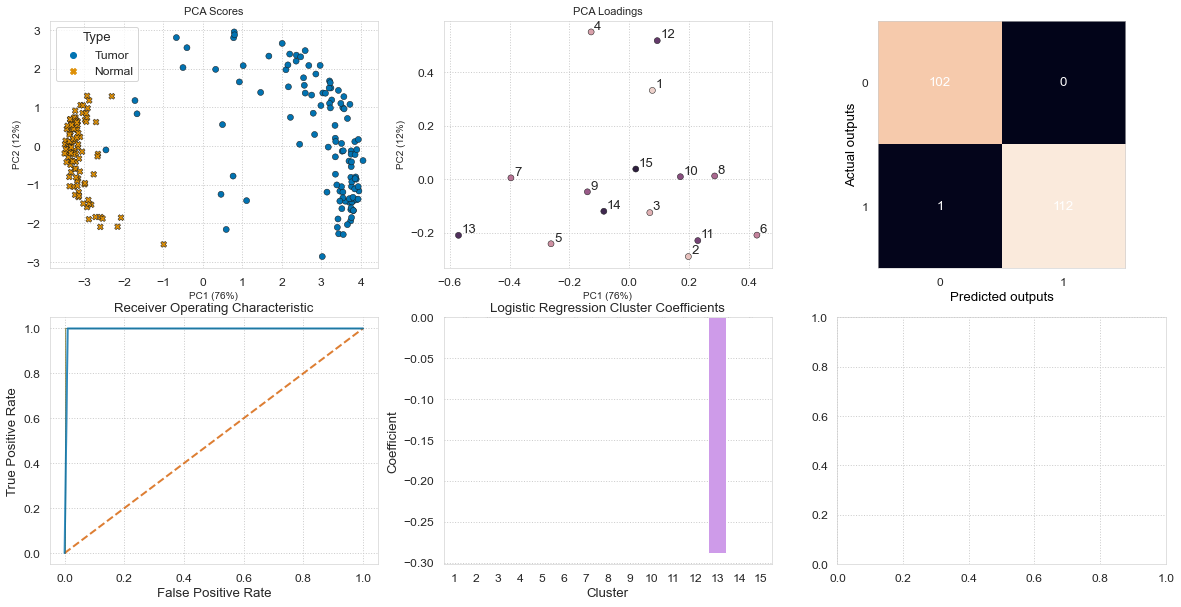

In [4]:
X = pd.read_csv("msresist/data/MS/CPTAC/CPTAC-preprocessedMotfis.csv").iloc[:, 1:]

centers = pd.DataFrame(model.transform())
centers["Patient_ID"] = X.columns[4:]
centers.iloc[:, :-1] = zscore(centers.iloc[:, :-1], axis=1)
centers.columns = list(np.arange(model.ncl) + 1) + ["Patient_ID"]


fig, ax = plt.subplots(2, 3, figsize=(20, 10))
# PCA analysis
centers = TumorType(centers)
plotPCA(ax[0, :2], centers, 2, ["Patient_ID", "Type"], "Cluster", hue_scores="Type", style_scores="Type", hue_load="Cluster")

# Regression
c = centers.select_dtypes(include=['float64'])
tt = centers.iloc[:, -1]
tt = tt.replace("Normal", 0)
tt = tt.replace("Tumor", 1)
lr = LogisticRegressionCV(cv=model.ncl, solver="saga", max_iter=10000, n_jobs=-1, penalty="elasticnet", class_weight="balanced", l1_ratios=[0.5, 0.9]).fit(c, tt)

# plotPredictionProbabilities(ax[3], lr, c, tt)
plotConfusionMatrix(ax[0, 2], lr, c, tt)
plotROC(ax[1, 0], lr, c.values, tt, cv_folds=4)
plotClusterCoefficients(ax[1, 1], lr)

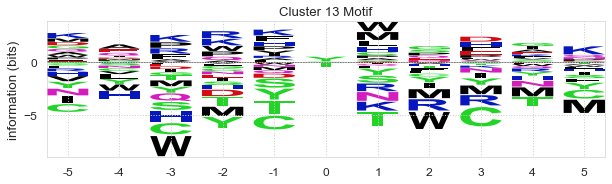

In [5]:
pssms = model.pssms(PsP_background=True)
motifs = [pssms[12]]
plotMotifs(motifs, [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5], titles=["Cluster 13"])

<AxesSubplot:ylabel='Kinase'>

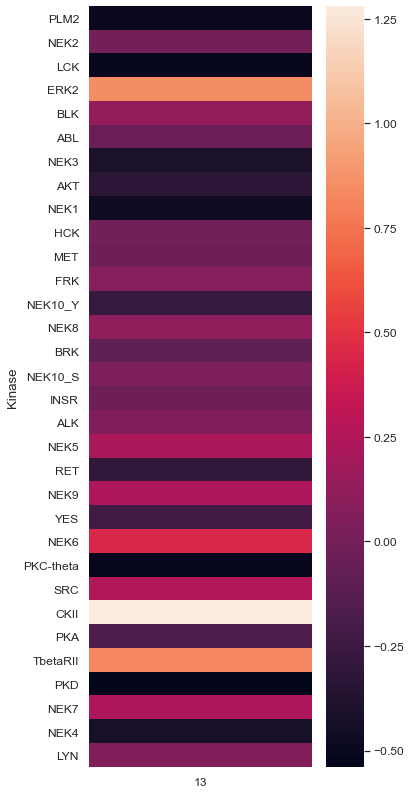

In [7]:
ukin = model.predict_UpstreamKinases()
ukin_mc = MeanCenter(ukin, mc_col=True, mc_row=True)

_, ax = plt.subplots(1, 1, figsize=(5, 14))
ukin_mc.columns = ["Kinase"] + list(np.arange(1, model.ncl+1))
sns.heatmap(ukin_mc.set_index("Kinase")[[13]])

## PAM250 21 CLUSTERS

In [8]:
with open('msresist/data/pickled_models/CPTACmodel_PAM250_21CL_W3_TMT2', 'rb') as p:
    model = pickle.load(p)[0]

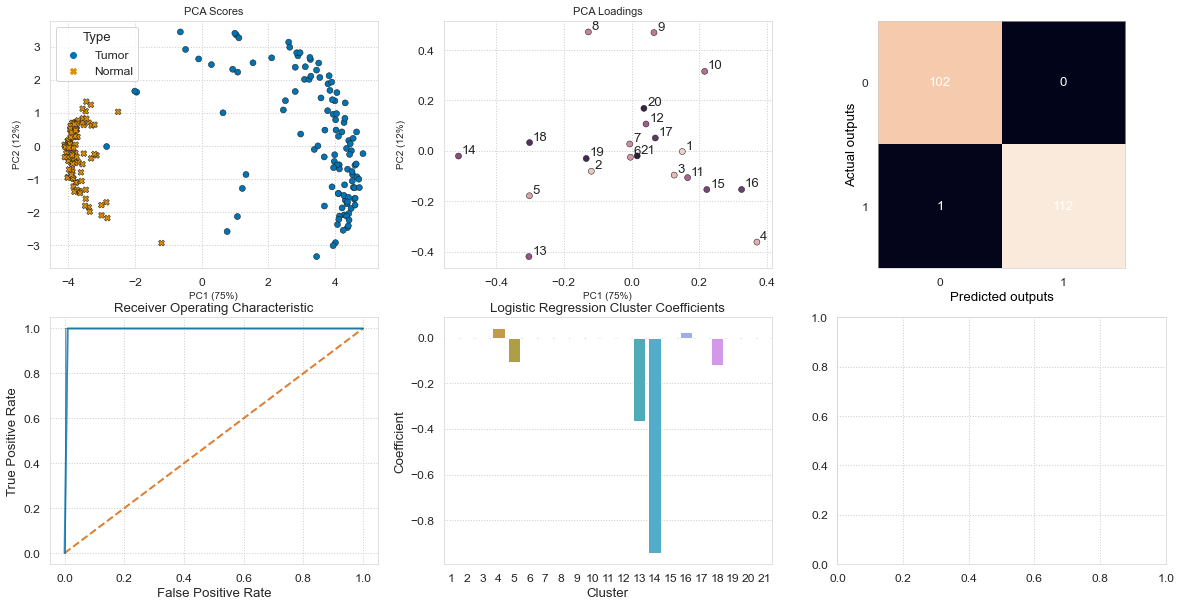

In [9]:
X = pd.read_csv("msresist/data/MS/CPTAC/CPTAC-preprocessedMotfis.csv").iloc[:, 1:]

centers = pd.DataFrame(model.transform())
centers["Patient_ID"] = X.columns[4:]
centers.iloc[:, :-1] = zscore(centers.iloc[:, :-1], axis=1)
centers.columns = list(np.arange(model.ncl) + 1) + ["Patient_ID"]


fig, ax = plt.subplots(2, 3, figsize=(20, 10))
# PCA analysis
centers = TumorType(centers)
plotPCA(ax[0, :2], centers, 2, ["Patient_ID", "Type"], "Cluster", hue_scores="Type", style_scores="Type", hue_load="Cluster")

# Regression
c = centers.select_dtypes(include=['float64'])
tt = centers.iloc[:, -1]
tt = tt.replace("Normal", 0)
tt = tt.replace("Tumor", 1)
lr = LogisticRegressionCV(cv=model.ncl, solver="saga", max_iter=10000, n_jobs=-1, penalty="elasticnet", class_weight="balanced", l1_ratios=[0.5, 0.9]).fit(c, tt)

# plotPredictionProbabilities(ax[3], lr, c, tt)
plotConfusionMatrix(ax[0, 2], lr, c, tt)
plotROC(ax[1, 0], lr, c.values, tt, cv_folds=4)
plotClusterCoefficients(ax[1, 1], lr)

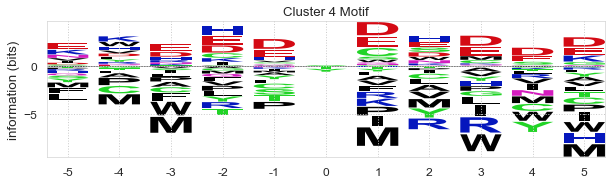

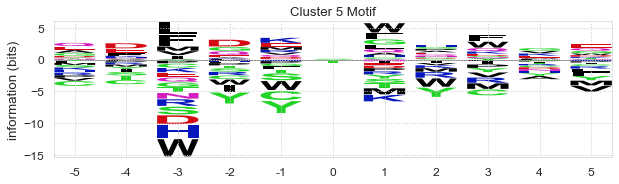

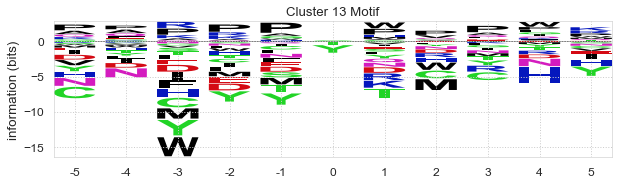

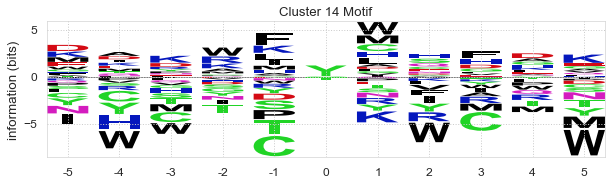

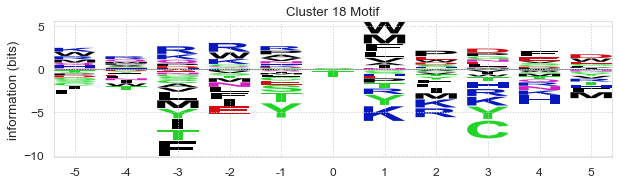

In [10]:
pssms = model.pssms(PsP_background=True)
motifs = [pssms[3], pssms[4], pssms[12], pssms[13], pssms[17]]
plotMotifs(motifs, [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5], titles=["Cluster 4", "Cluster 5", "Cluster 13", "Cluster 14", "Cluster 18"])

In [ ]:
ukin = model.predict_UpstreamKinases()
ukin_mc = MeanCenter(ukin, mc_col=True, mc_row=True)

_, ax = plt.subplots(1, 1, figsize=(15, 14))
ukin_mc.columns = ["Kinase"] + list(np.arange(f1, model.ncl+1))
sns.heatmap(ukin_mc.set_index("Kinase")[[4,5]])